In [1]:
# Preamble 
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

from astropy.table import Table,join,hstack,vstack
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# First read in the unvalidated GALAH DR4 file
galah_dr4_raw1 = Table.read('../analysis_products/galah_dr4_allspec_not_validated.fits')
galah_dr4_raw1['sobject_id_left'] = galah_dr4_raw1['sobject_id']
galah_dr4_raw2 = Table.read('../analysis_products/galah_dr4_allspec_not_validated.fits')
galah_dr4_raw2['sobject_id_right'] = galah_dr4_raw1['sobject_id']

In [3]:
# Then read in GALAH DR3
wide_binaries_both = Table.read('../auxiliary_information/GALAH_DR3_ElBadry_sobject_ids.fits')
wide_binaries = Table()
wide_binaries['sobject_id_left'] = wide_binaries_both['sobject_id_1']
wide_binaries['sobject_id_right'] = wide_binaries_both['sobject_id_2']

In [4]:
# Join them with the tmass_id keyword
joined_left = join(galah_dr4_raw1, wide_binaries, keys='sobject_id_left')
joined = join(joined_left, galah_dr4_raw2, keys='sobject_id_right')

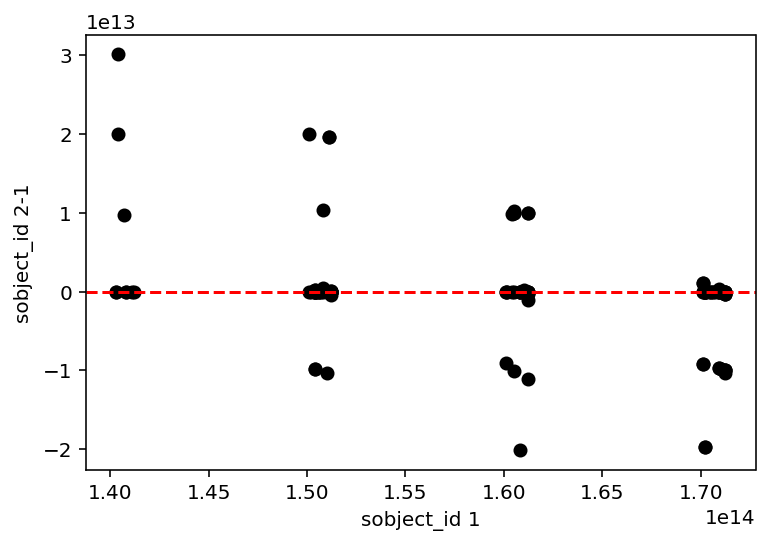

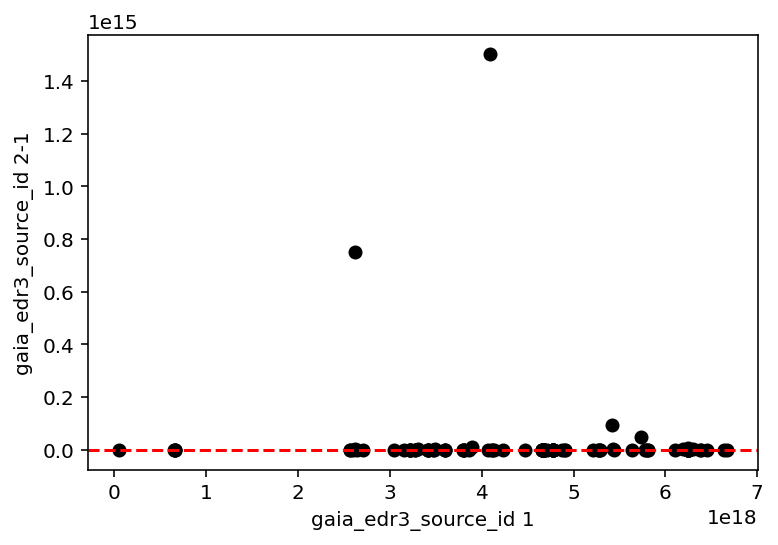

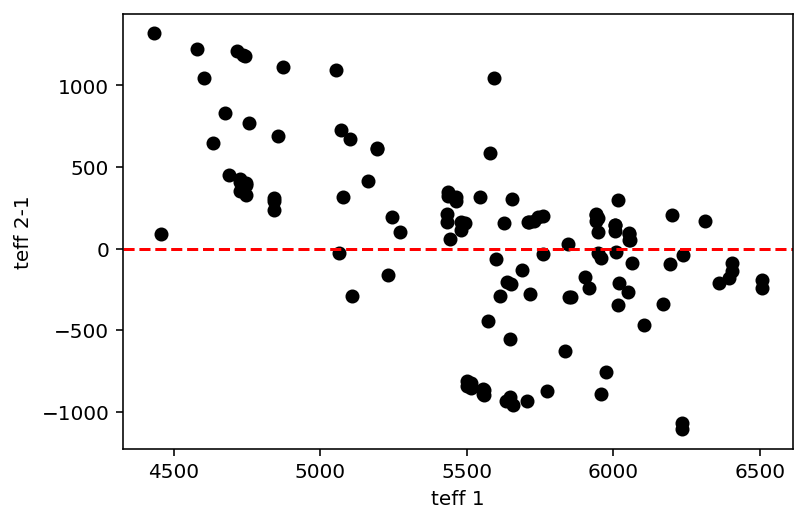

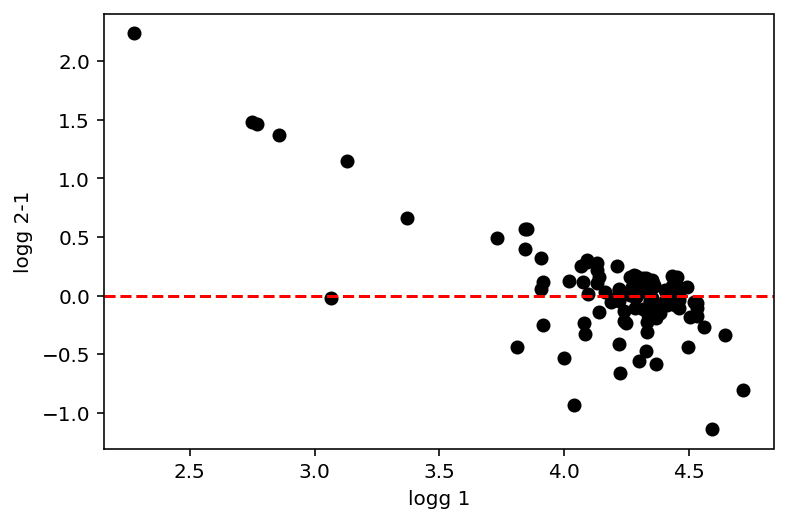

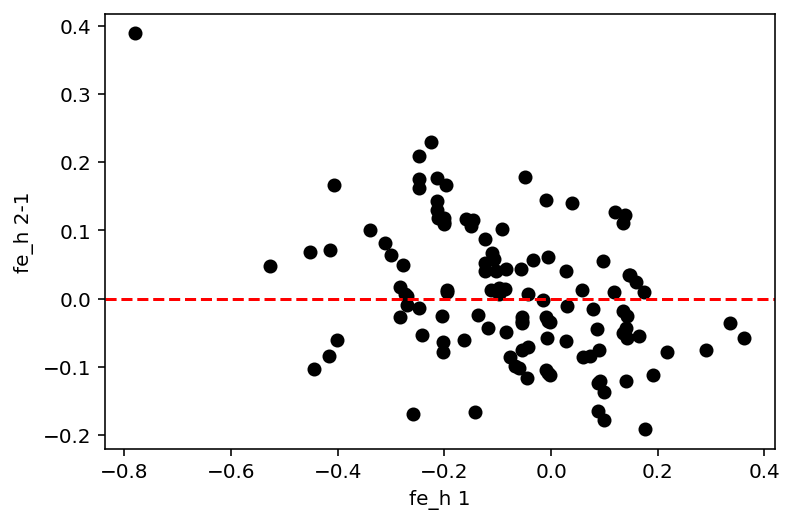

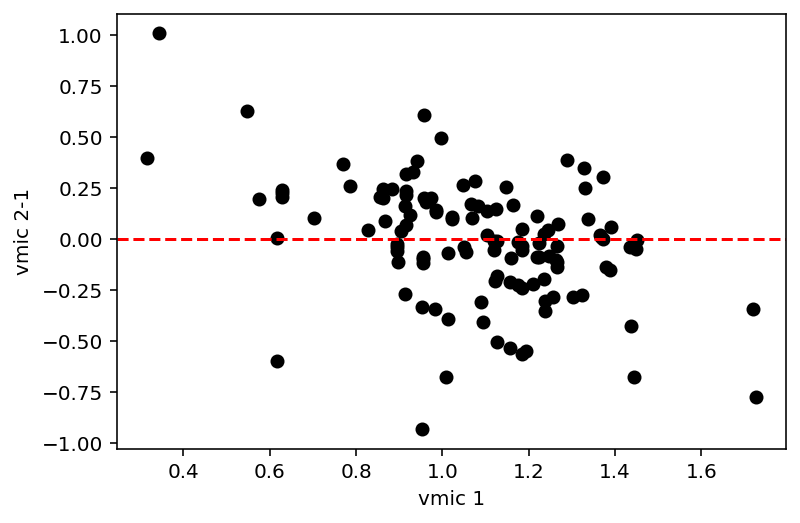

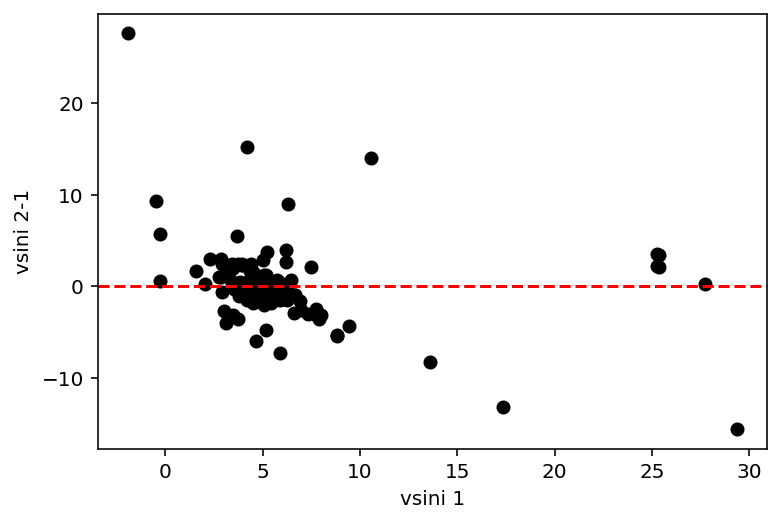

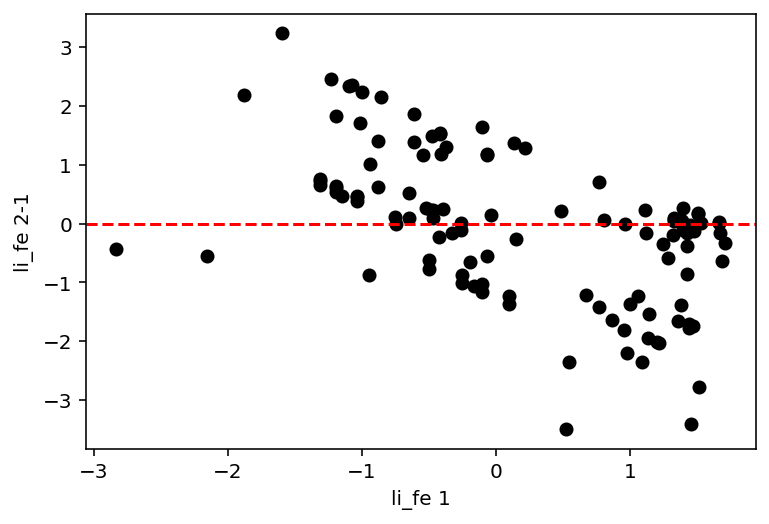

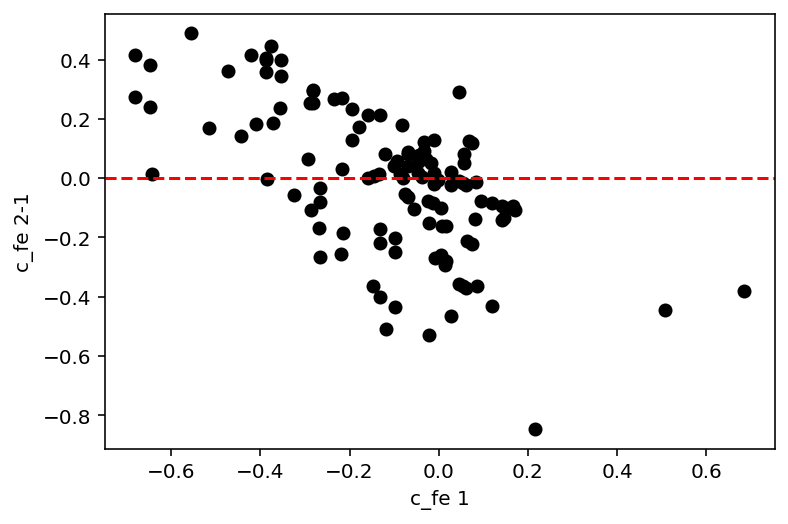

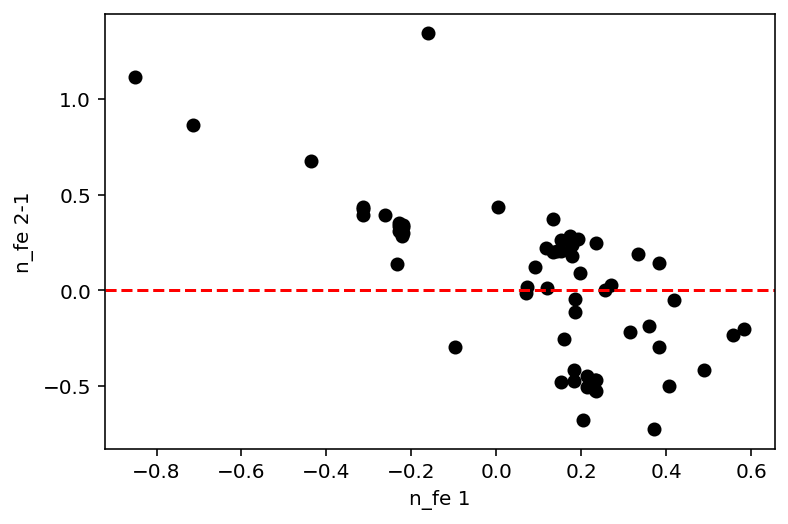

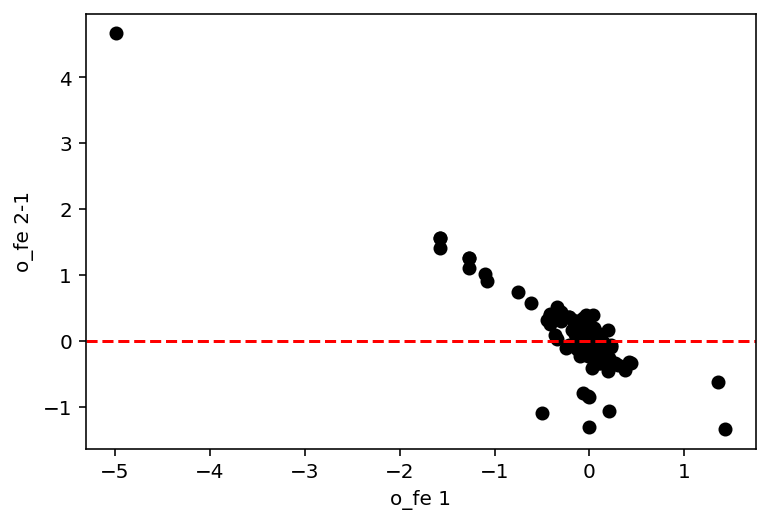

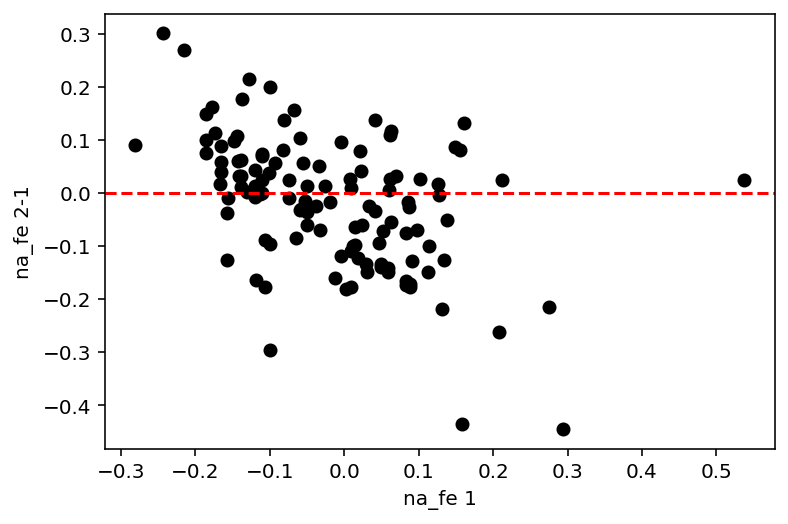

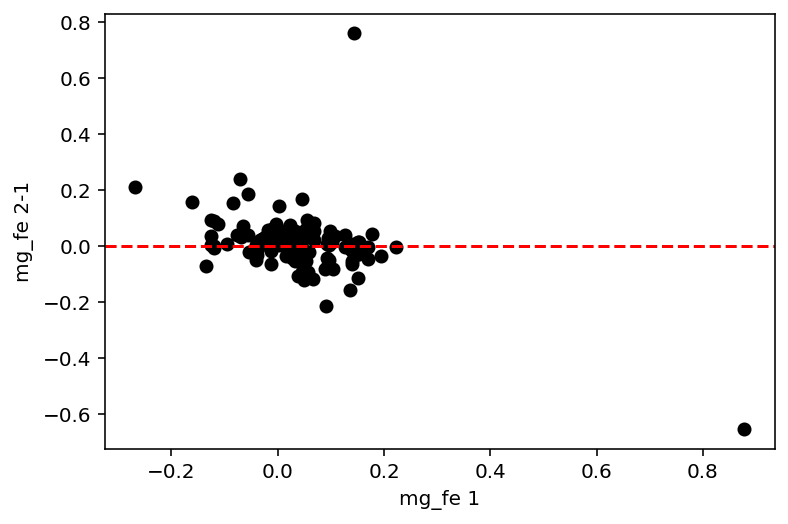

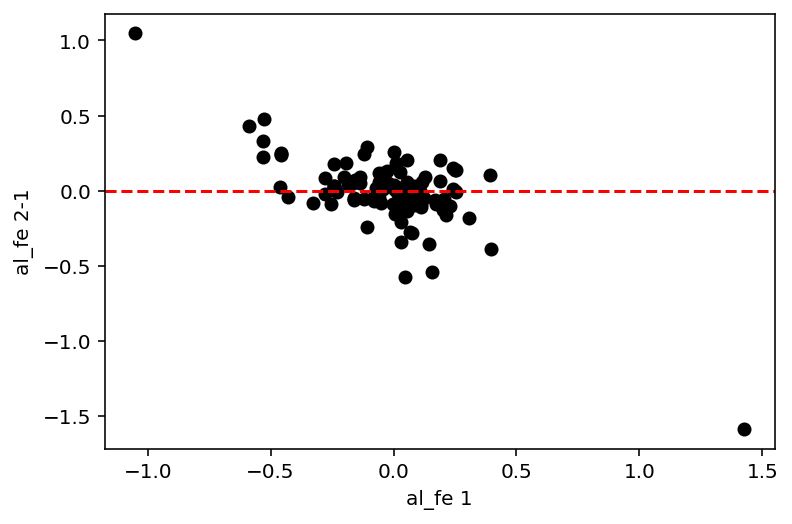

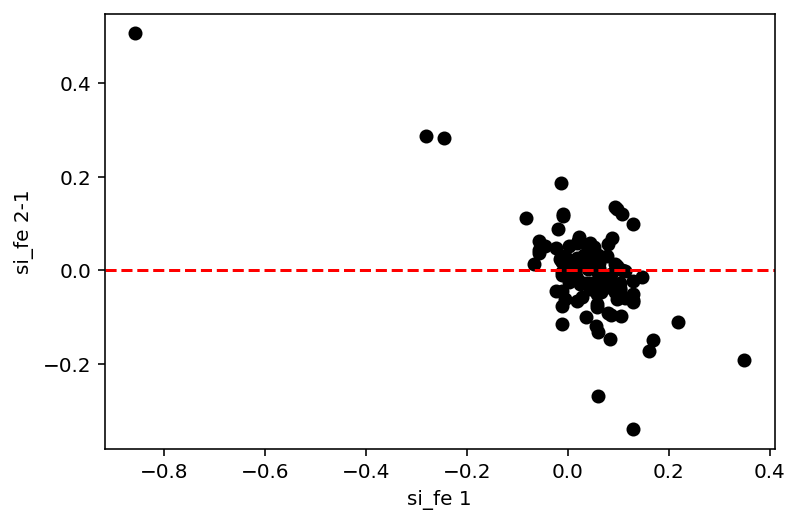

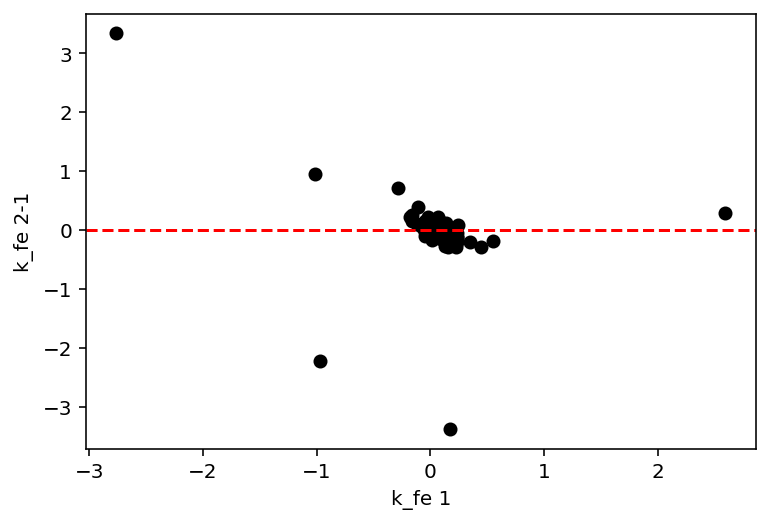

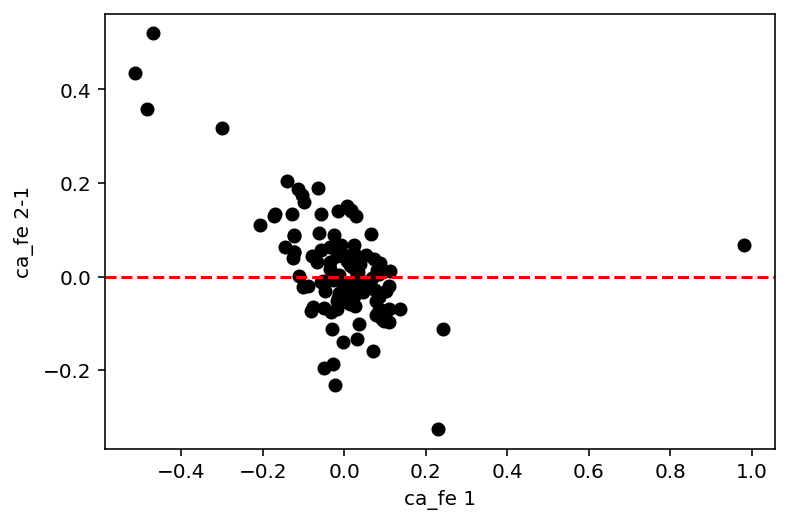

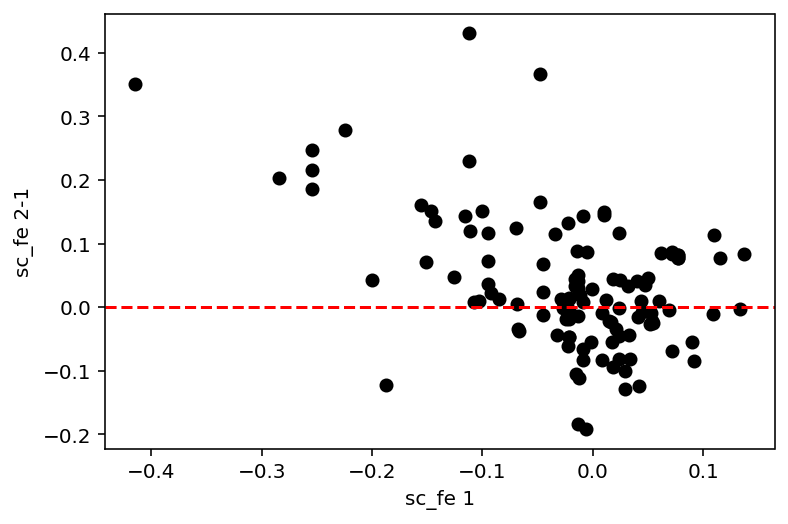

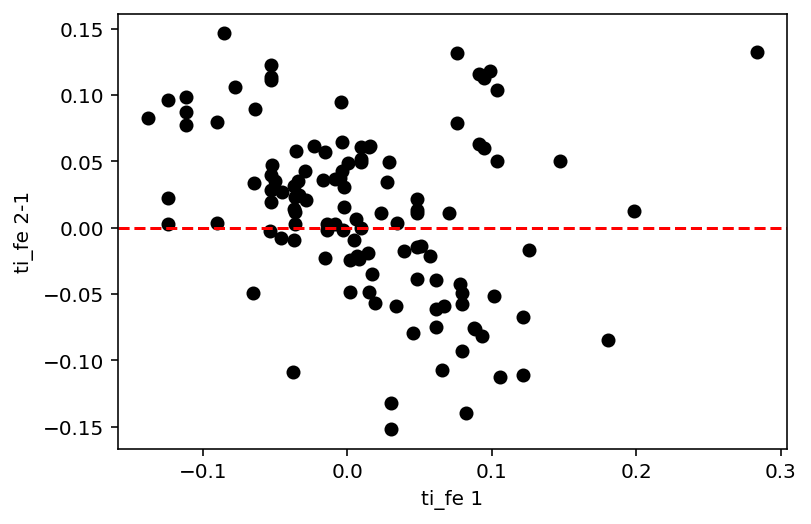

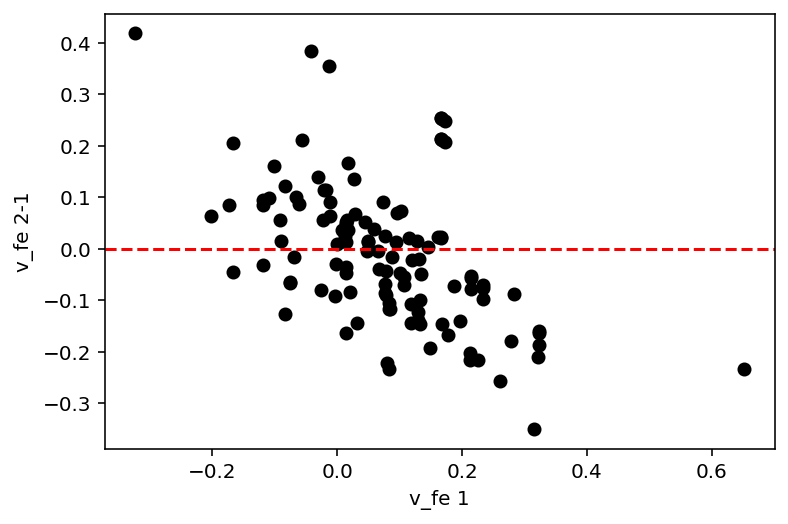

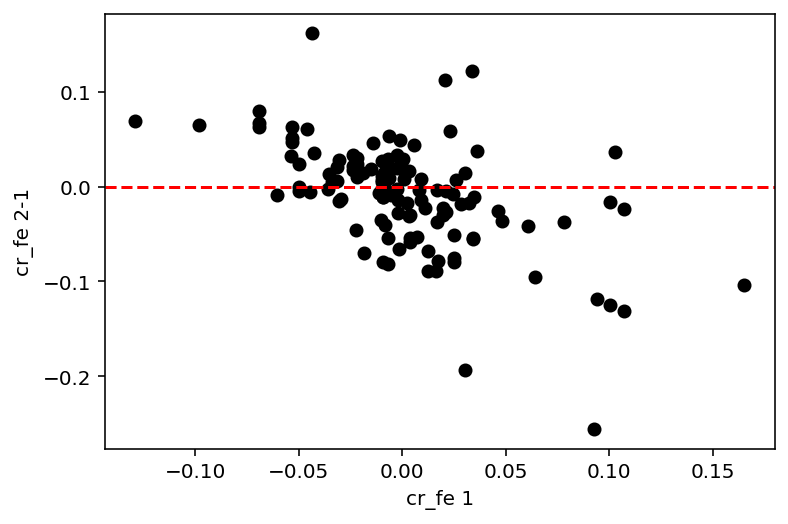

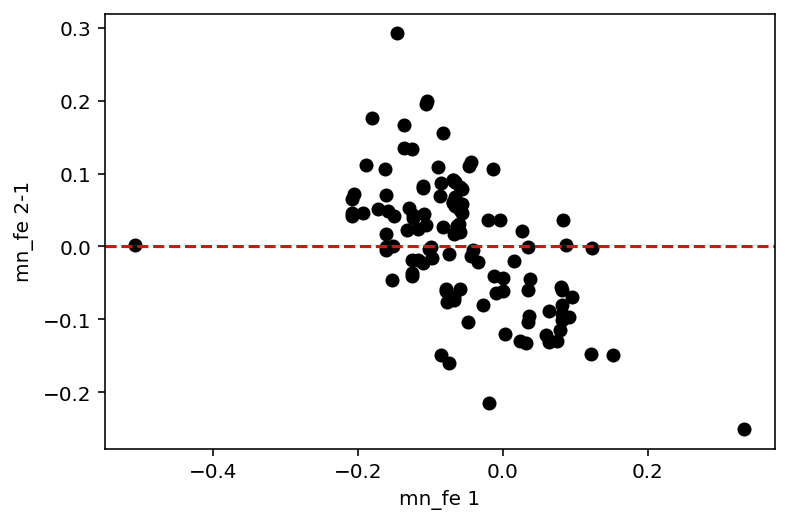

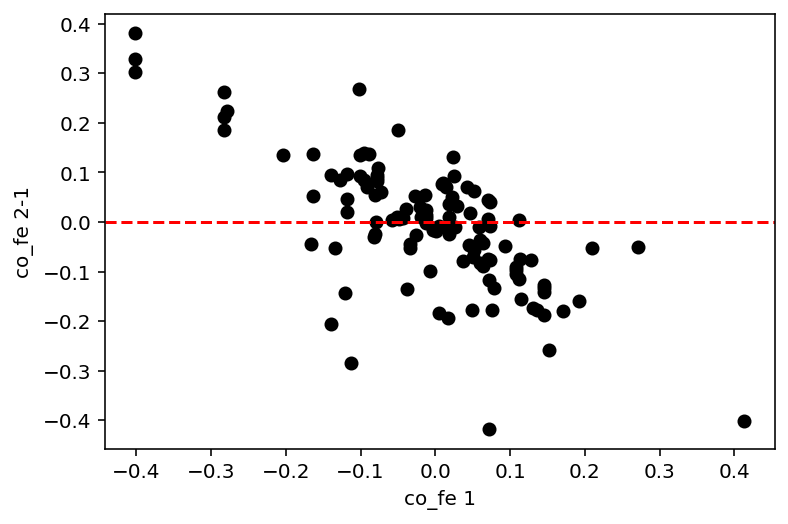

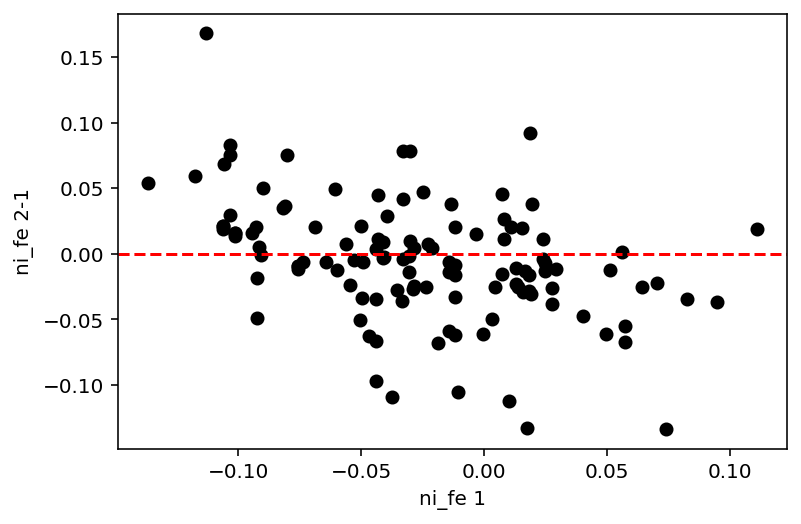

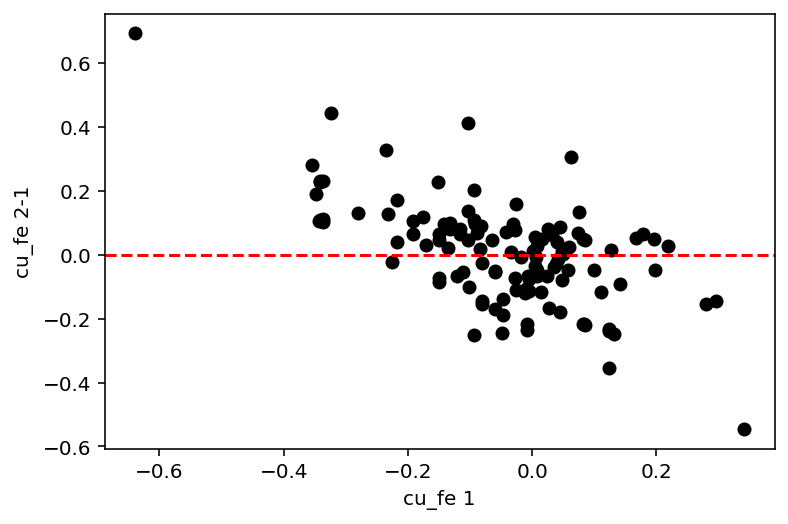

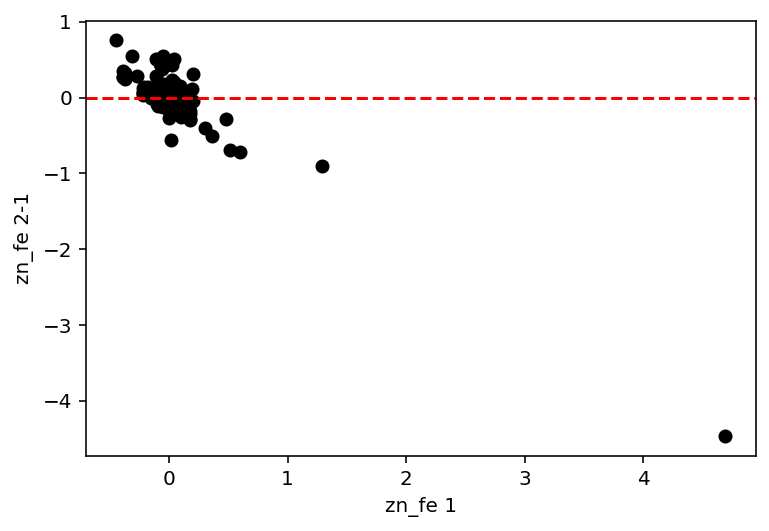

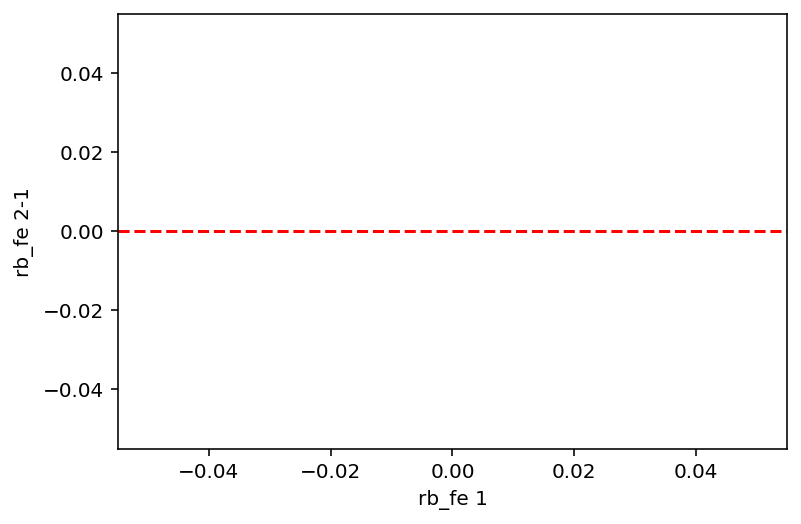

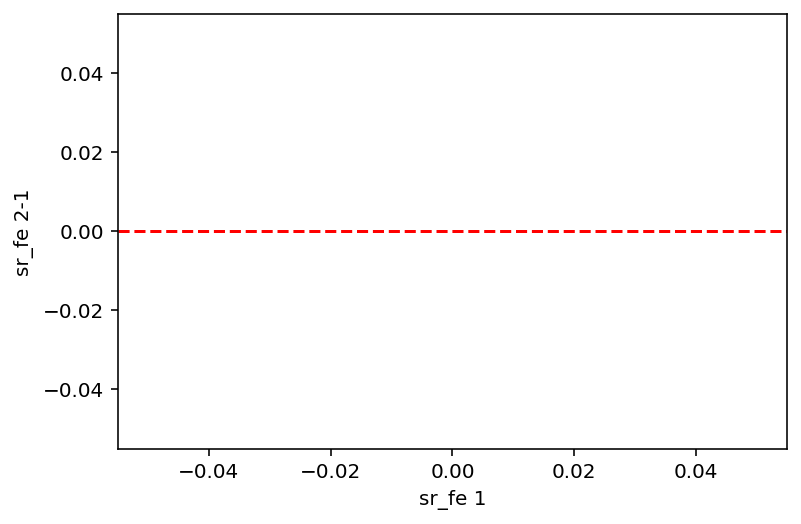

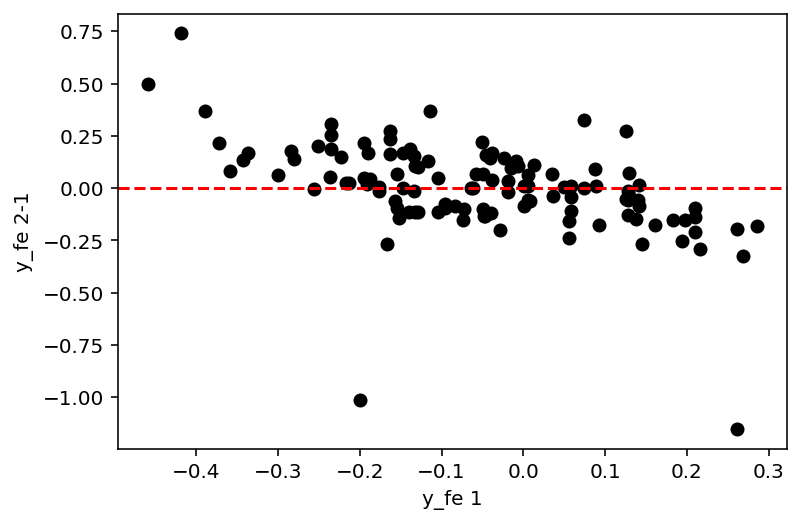

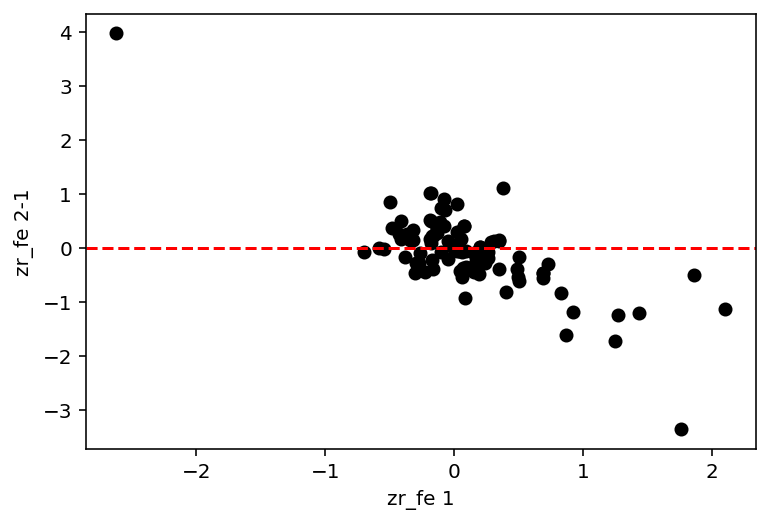

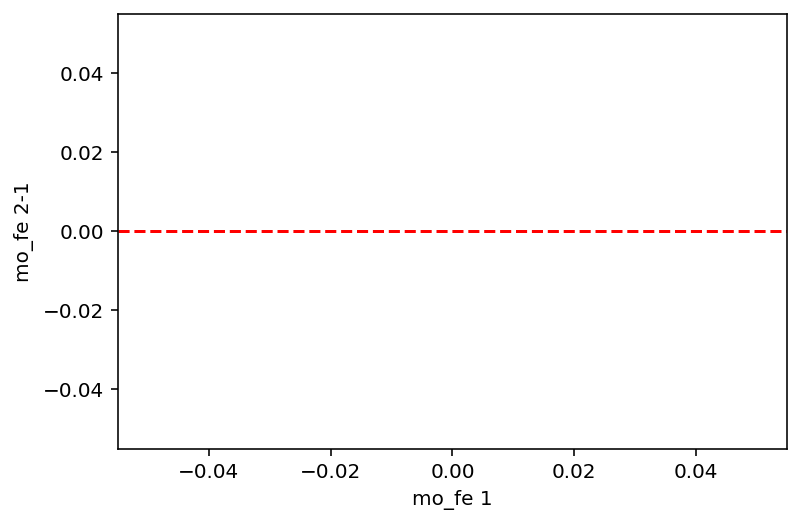

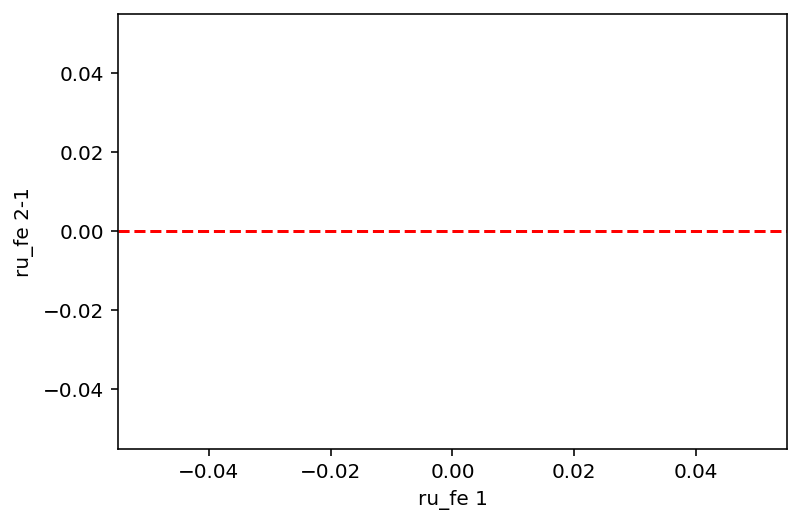

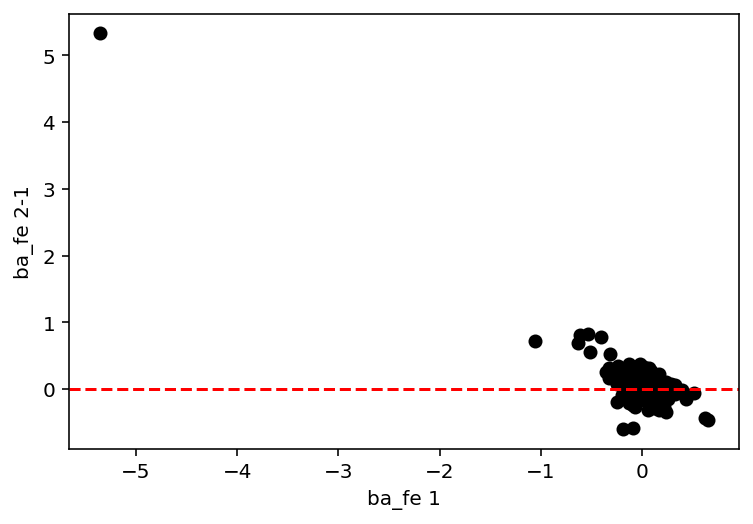

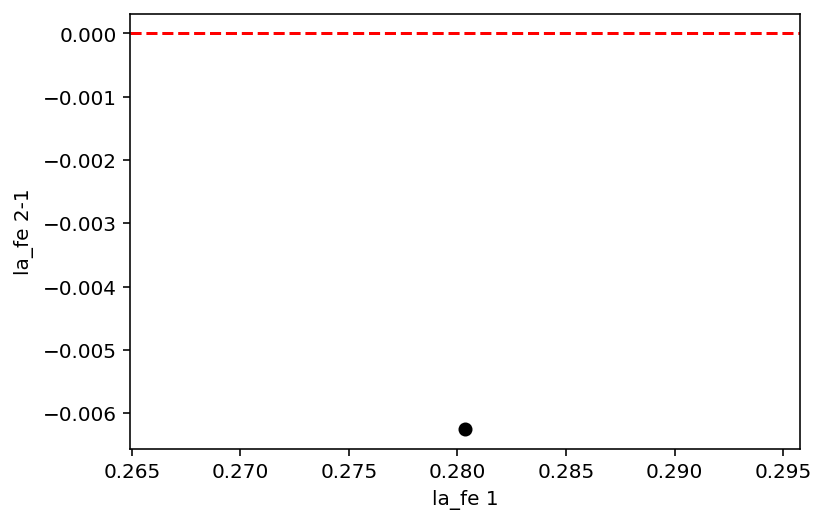

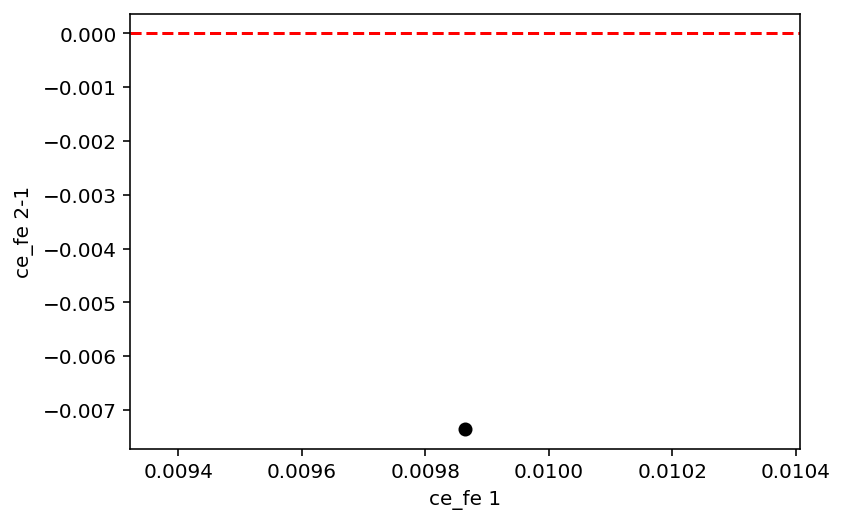

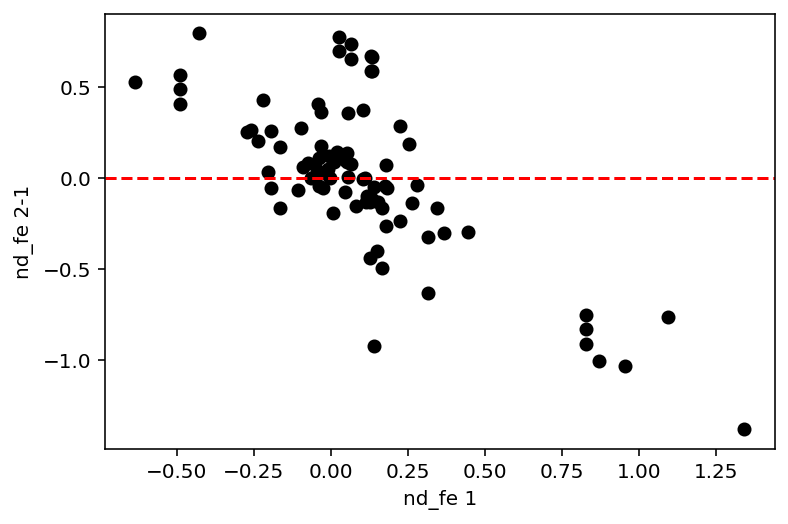

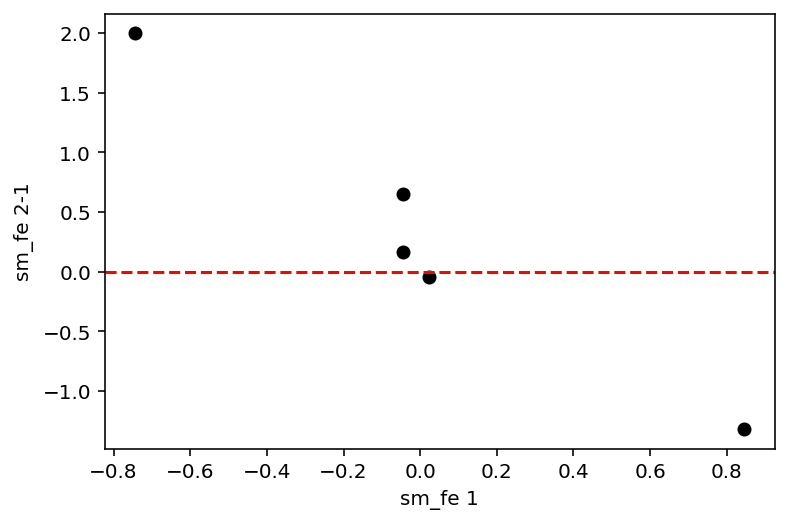

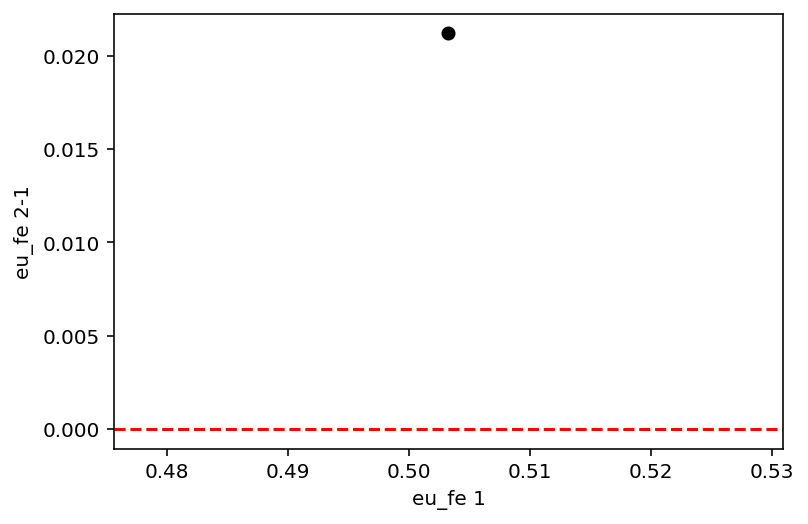

In [5]:
for label in joined.keys():
    if (label not in ['tmass_id_1','sobject_id_left','sobject_id_right','model_name_1']) & (label[:4] not in ['flag','cov_']) & (label[-2:] not in ['_2']):
        label = label[:-2]
        
        plt.figure()
        plt.scatter(
            joined[label+'_1'],
            joined[label+'_2']-joined[label+'_1'],
            c='k'
        )
        plt.axhline(0,c='r',ls='dashed')
        plt.xlabel(label+' 1')
        plt.ylabel(label+' 2-1')
        plt.show()
        plt.close()